In [1]:
%load_ext autoreload
%autoreload 2

# The Netflix Predicament

Grant Miner, Elias Wheatfall

## Introduction

“I’ve watched everything on Netflix.” “There’s nothing good to watch.” We’ve all heard these sayings before, but why?  To get to the bottom of this endless frustration this research project was formed (***Adjust this***). The research question at hand is, does Netflix cater their content towards a specific type of audience, or does Netflix cast a much wider net? 

## Methodology

In order to answer our question and dive deep into the trends across Netflix’s offerings, we first needed a complete Netflix catalog to search within. Unfortunately, Netflix shut down its application programming interface (API) several years ago. Luckily, there is a site called Flixable which scrapes Netflix’s catalog daily. 

We accessed our data through Kaggle.com, a website that hosts a community-sourced repository of datasets and code to deal with them. The dataset we chose to work with is called “Netflix Movies and TV Shows,” and it was last updated on January 18, 2021. It was scraped from Flixable by Shivam Bansal and uploaded to Kaggle. We were easily able to access the data he scraped through Kaggle’s API. The API allows for direct downloading of datasets in the form of comma-separated value (CSV) files. After acquiring an API authentication key, we downloaded the dataset through the API to begin parsing and processing the data.

However, that dataset was not sufficient for the exploration we wanted to do. The dataset does not include any sort of viewer-rating of the content (like a star-rating that Netflix natively provides or Rotten Tomatoes ratings). We originally intended to scrape the data directly from Rotten Tomatoes, but their API is not designed to handle the thousands of requests we would need to run. For context, the original catalog we acquired had 7,787 titles. Thankfully, Kaggle user Eugenio Scionti had already compiled an enriched version of the original catalog of data that included the Tomatometer™ ratings for all titles that had them, as well as other data that Rotten Tomatoes gathers about various titles.

To begin interpreting the data, we imported the pandas library and used it to first read the CSV file into a data frame, before looking for undefined values such as “NaN” and replacing them with the string “NONE.” Because “NaN” is not equivalent to itself, there is no simple way to look through the data frame for “NaN” values and replace them. We made use of the function within the pandas library `fillna()` to replace them.


In [2]:
import pandas as pd
import processing as pg
import plots

netflix_data = pd.read_csv('netflix_titles_enriched.csv')
df = pd.DataFrame(netflix_data);
netflix_data = df.fillna('NONE', inplace = True);

### Processing the Data

To deal with the complex data frame and its thousands of “NONE” values, we created a series of functions that could parse through columns of the data frame and prepare them for plotting. 

The first plot is of the content ratings (e.g. G,  TV-14, PG-13, etc.). In order to determine what ratings are included in the dataset and how often they occur, the function below creates a list of all of the unique values in the “ratings” column of the data frame and a matching list that contains how many times each value occurs in the column. 


In [3]:
(ratings, counts) = pg.extract_rating_and_title_count(df)

After generating the lists, the “NONE” values then have to be removed. This is performed with another function that goes through each list to make sure there are no empty values in either list. The function will remove the matching value from the other list. Most plots will rely on this code to assure that all of the correct values are plotted.


In [4]:
(ratings, counts) = pg.remove_rows_containing_nan(ratings, counts)

The last step in preparing the data for plotting is to sort these lists based on which content rating is the most common. (This decision is for the aesthetic purposes of the graph). The sorting is quite simple, as there is another function designed to do exactly this. Plotting will be performed in the Results section.


In [5]:
(counts, ratings) = pg.sort_list_based_on_other(counts, ratings, greatest_to_least=True)

The next graph is a violin plot of Rotten Tomatoes Scores for the Netflix titles. Processing for this function is done behind the scenes in a function called `two_columns_to_violin_dataframe()` which takes in a set of dataframe columns and converts them to the correct form for plotting using the seaborn library `violinplot` function. The code is executed in the Results section.

The final graph is a graph that displays how quickly new titles are added to Netflix. In order to get the difference between the release and add year, we extracted the release year and add date from the data frame and found the difference (in whole years). We processed this data using similar methods to the pie chart processing. The code below takes the data frame as input and returns two lists: one that represents all of the unique year differences, and one that represents the number of occurences of each difference.

In [6]:
(difference_counts, differences) = pg.release_to_added_times(df)

## Results

### Content Ratings

We plotted content ratings data on a pie chart by passing our labels, "ratings," and the associated quantities of content associated with each rating on Netflix, "counts," to our plot code.


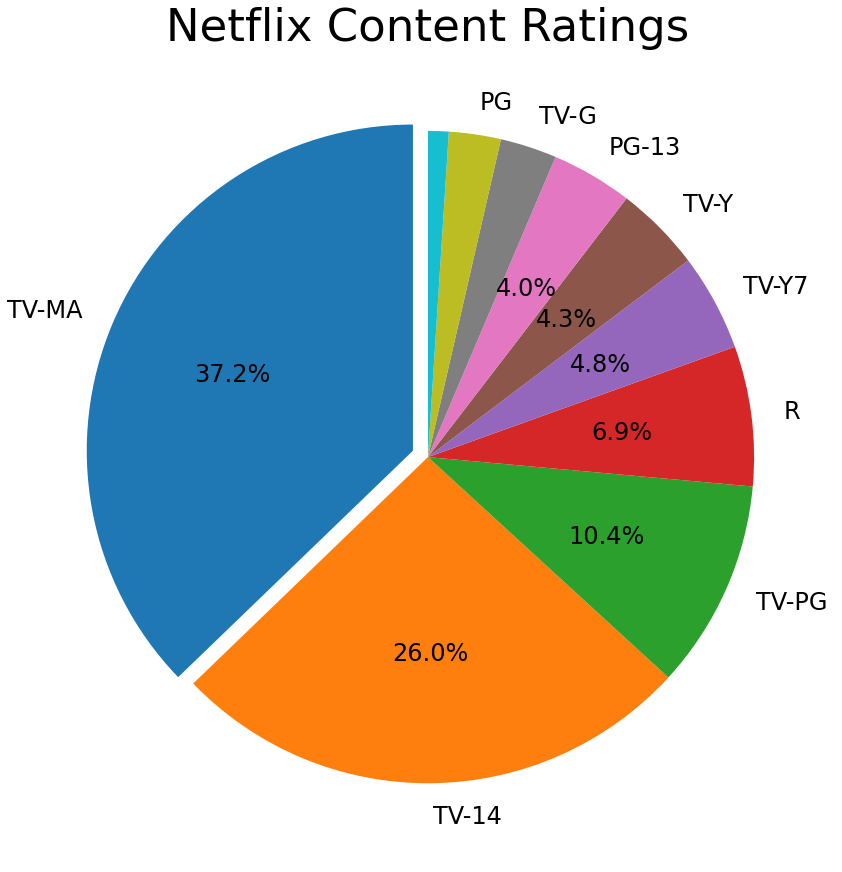

In [7]:
%matplotlib inline
plots.pie_chart(ratings, counts, 10, 0)

# The 10 is our end index (inclusively) displaying the first 10 ratings of the titles from least to greatest.

From our plotting of TV ratings, we produced a very interesting graph with the most apparent result being that ~50% of the content is rated MA or R rated. This suggests that more explicit content is what Netflix believes sells. But even more interesting than this is the abundance of TV ratings over non-TV-ratings (movies), where ~75% of ratings are from TV shows. We believe that this is due to the high time commitment associated with movies. TV shows can be consumed in less time, and TV shows tend to be of lower emotional investment.  Overall this suggests that Netflix may believe that TV shows and explicit content are what keep people engaged and coming back for more.

When considering how Netflix can maximize online times for each user, the best method is to create content that people do not want to stop watching. So instead of pushing content with a closed plot within 90-120 minutes, Netflix realizes they can pack the same plot into many hours of television with well-placed cliffhangers to encourage binge consumption of their content.

### Content Reviews: Rotten Tomatoes

We next searched for trends among the Rotten Tomatoes ratings of Netflix titles to judge whether Netflix content is "bad." We decided to split a violin plot by critic reviews and audience reviews, which revealed an interesting trend between the two groups.

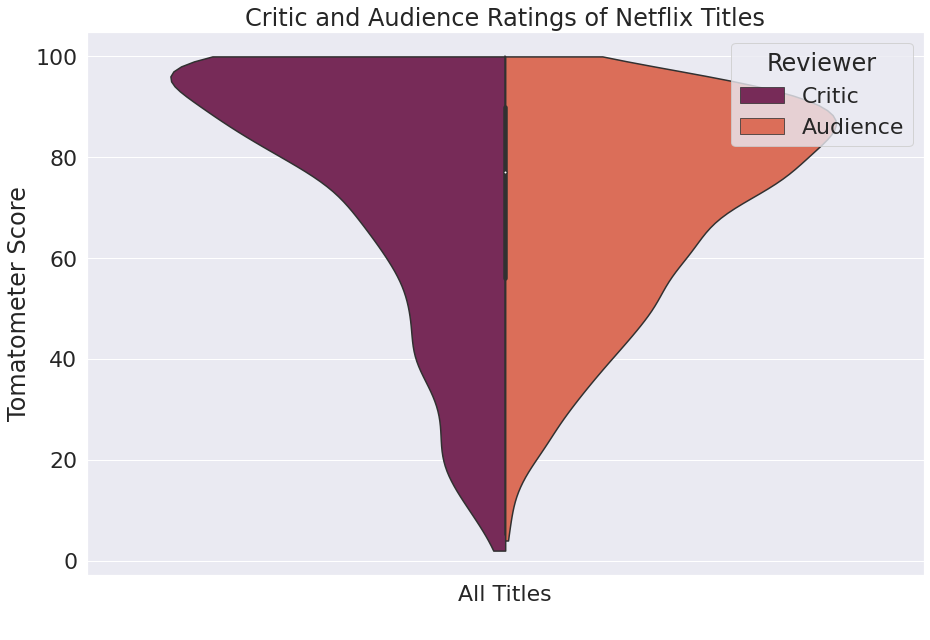

In [8]:
pg.critics_vs_audience_scores(df)

In our data frame, we split the audience and critics data with the conditional assignment of “Critics” and “Audience”. We are able to visually see the difference between the typical audience rating versus critics. It is important to note that in order to plot this data we had to use data that had both critics tomatometer scores and audience scores. The data pulled through the API had many “Not a number” (Nan) values, requiring us to remove them from the plot. It is suspected that the shows without critic reviews may be “unworthy” of being rated and would receive a much lower score, so rather than the triangular shape shown above, the shape should be more hourglass-like.

Furthermore, we were not able to use titles that did not have both a critic and audience score. The same conclusion is drawn from above. When all of the critic scores were plotted alone, without the qualification of being paired with an audience score, the plot had high frequency in the low 90s and around 10.


### How Long Until It's on Netflix?

Finally, we examined whether Netflix really has "no new content" by comparing the release date to add date.

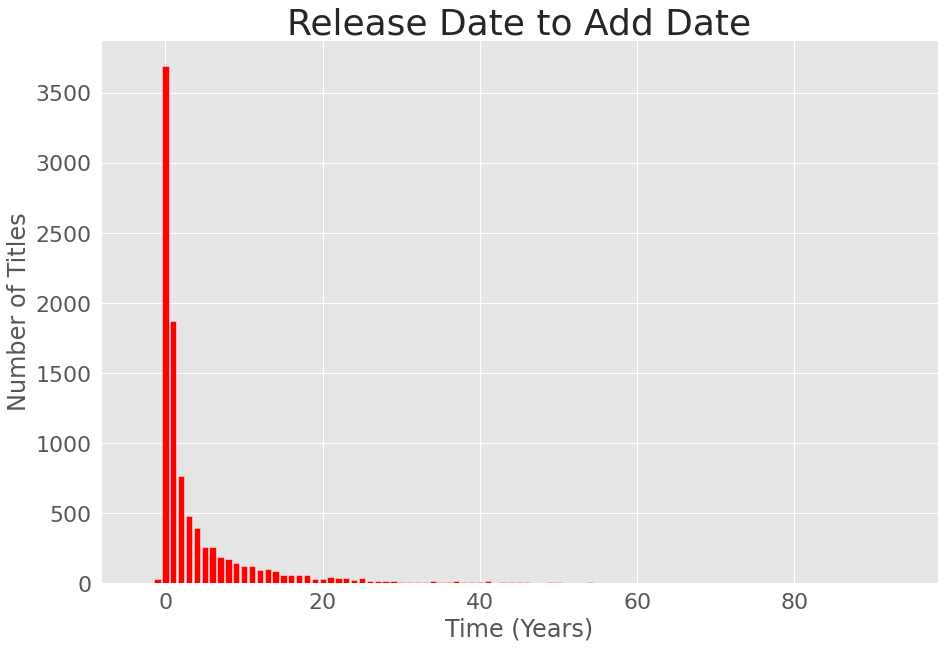

In [9]:
plots.bar_graph(x_data=differences, y_data=difference_counts, titles=["Time (Years)", "Number of Titles", "Release Date to Add Date"], color="red")

It is important to note that Netflix was created in 1997 and includes titles created before it could possibly even add the titles. This is why the data has many titles added 20+ years after their creation. Ultimately, this data displays that Netflix has added titles fairly quickly to their platform and as time elapses they add more titles every year, quashing the notion that there is never anything new to watch. 

However, Netflix's own content is included in this data, and naturally all of its content is part of the 0 bar because it was all released and added on the same day. But never fear! With Netflix's prolific pipeline of new content, there are always new things to watch!

## Conclusion

Netflix has streamlined itself to be an addictive force. It is always primed to answer a craving for compelling, stimulating content, or vapid, inconsequential content. Even within these categories, Netflix still has determined how to influence users to spend more and more time on their platform. By including a plethora of somewhat risqué offerings, Netflix can keep the baser sides of users watching hours and hours more of content. Its choice to focus on TV shows, as mentioned earlier, strongly encourages users to binge for hours in order to resolve plot lines in one sitting. 

However, all of this would not be possible without at least half-decent content. From the ratings that were collected, most of the content scores relatively high on Rotten Tomatoes. By pairing the qualities mentioned in the previous paragraph with substantive, quality content, Netflix allows users to subconsciously justify spending hours sitting in front of TVs, computer screens, tablets, or phones.

Lastly, Netflix manages to provide content that is popular and recent. Admittedly, Netflix's current position in the TV markets allows it to influence what is popular, but this development is relatively recent with its vast forays into original content offerings. As shown in the bar graph above, most of Netflix's titles are added to the service quite quickly. 

To summarize, Netflix knows its audience and users amazingly well. It has optimized its algorithm and content to promote high usage of its platform. All of these observations, as well as the A/B testing they are always executing behind the scenes, help to solidify the claim that Netflix does not specifically cater their content to one specific audience, but it definitely firmly grasps human tendencies and has curated a content library optimized to snag as many users as possible for as long as possible.